In [2]:
import matplotlib.pyplot as plt
import numpy as np
from wave1D import functional, mesh, multiscale, operator

% matplotlib inline

# Example 0

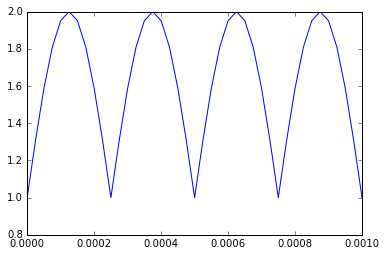

In [10]:
H = 0.001
h = 2.5e-05
msh = mesh.make_mesh_from_npt(0.0, H, (H / h + 1))
velocity = np.abs(2.0 * functional.gated_cosine(msh-H / 2, 4000, 0.0002)) + 1.0

velocity = np.abs(np.sin(4000 * np.pi * (msh-H / 2))) + 1.0


plt.plot(msh, velocity)

In [32]:
# Computing local stiffness operator.
stiffness = operator.assemble_p1_stiffness(msh, velocity)

# Computing multiscale basis functions.
ms_basis0, ms_basis1 = multiscale.get_multiscale_p1_basis(stiffness)

# Computing standard lagrangian basis functions.
basis0 = -(msh - H) / H
basis1 = msh / H

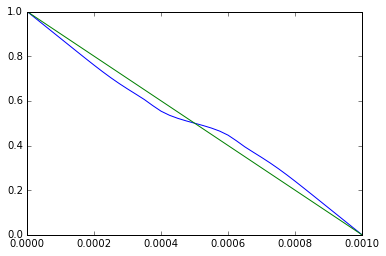

In [33]:
plt.plot(msh, ms_basis0)
plt.plot(msh, basis0)

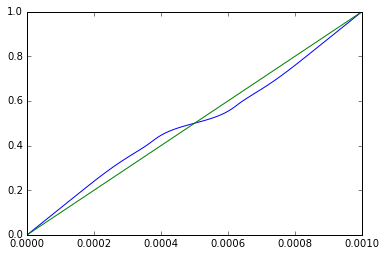

In [30]:
plt.plot(msh, ms_basis1)
plt.plot(msh, basis1)

In [9]:
# Computing local mass operator.
mass = operator.assemble_p1_mass(msh)

ms_local_mass = multiscale.assemble_multiscale_p1_local_mass(mass, ms_basis0, ms_basis1)
ms_local_stiffness = multiscale.assemble_multiscale_p1_local_stiffness(stiffness, ms_basis0, ms_basis1)

In [10]:
print ms_local_mass
print ms_local_stiffness

[[ 0.00031686  0.00018314]
 [ 0.00018314  0.00031686]]
[[ 1411.98510607 -1411.98510607]
 [-1411.98510607  1411.98510607]]


In [11]:
print np.linalg.eigvals(ms_local_mass)
print np.linalg.eigvals(ms_local_stiffness)

[ 0.00013373  0.0005    ]
[ -2.45563569e-11   2.82397021e+03]
